In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

# Feature Selection
### Raw data

In [15]:
data = scipy.io.loadmat("Dane/ALLAML.mat")

In [ ]:
# data

In [16]:
type(data)

dict

In [17]:
X = data['X']
y = data['Y']

In [18]:
X.shape, y.shape

((72, 7129), (72, 1))

In [13]:
# y

In [19]:
y = y[:, 0]
y.shape

(72,)

In [20]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-1.017172,0.074113,-0.406939,-0.905824,-0.341244,-1.077075,0.926511,0.147111,1.922802,0.474334,...,0.102543,-0.514763,-1.295717,0.019007,-0.064038,0.027578,0.121334,0.588985,-0.388650,-0.159994
1,-0.249817,0.906262,0.057617,0.837052,-0.087528,-0.025783,-0.931584,0.227202,0.233942,-0.106453,...,-0.067427,0.551561,-0.277449,0.159027,0.320191,0.003201,-0.043314,0.031879,-0.572969,0.412253
2,0.394762,1.155907,-2.436312,1.069436,-1.004181,-1.689219,0.343441,-1.765056,1.408315,-1.378024,...,1.483553,1.735638,0.511994,-0.564852,1.645782,0.792121,2.290824,0.700407,-0.329348,-0.259515
3,-0.208891,0.479786,2.225541,-1.585099,-1.356110,-1.256726,0.782500,-0.623763,-0.347652,-0.295649,...,0.686816,0.545019,2.628618,-0.549001,-1.466475,-0.340289,-0.648641,-1.327461,-0.492831,-1.503531
4,0.087820,0.365365,-0.553640,-0.190798,0.190742,0.746051,0.241580,0.687724,-0.112777,0.676729,...,-0.205528,-0.063374,0.786583,0.322825,0.147288,-1.175747,0.048695,0.098732,-0.605025,0.138569


In [21]:
np.unique(y, return_counts=True)

(array([1, 2], dtype=uint8), array([47, 25], dtype=int64))

## Performance without Feature Selection

* curse of dimensionality
* features without predictive power

In [22]:
models = [LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier()]
names = ['LR', 'SVC', 'DT', 'RF']

basic_acc = {}
for m, n in zip(models, names):
    basic_acc[n] = round(cross_val_score(m,X,y,cv=10).mean(), 3)

In [23]:
basic_acc

{'LR': 0.957, 'SVC': 0.805, 'DT': 0.864, 'RF': 0.961}

## L1 Regularization
* training with feature selection involved


In [40]:
LogisticRegression?

In [58]:
model = LogisticRegression(penalty="l1", solver='saga', random_state=100)

In [59]:
model.fit(X, y)

LogisticRegression(penalty='l1', random_state=100, solver='saga')

In [60]:
model.coef_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00838421,
        0.        ]])

In [61]:
model.coef_[0].tolist()

[0.0,
 0.0,
 0.0,
 0.0008577572039006268,
 0.0,
 0.0,
 -0.0014395380743701567,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.002924525769682889,
 0.0,
 0.0,
 -0.0008658072167149049,
 0.0,
 0.0,
 -0.0008310409931659088,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0016953789976246218,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00035618616256119875,
 0.0,
 0.0,
 -0.0028394091091790935,
 -0.0022297889587205807,
 -0.004420536750401285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0024667755668649205,
 0.004608224952840143,
 0.0033811696370697514,
 -0.000847886953843857,
 -0.0021710162970285537,
 0.0,
 -0.00010276276599723449,
 0.0011794090534744473,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -4.76214768384677e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -6.046368406995294e-05,
 0.0,
 -0.0008287501626951421,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0016415170063649978,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011415049374265381,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0021999354164133835,
 0.0

In [62]:
len(model.coef_[0].tolist())

7129

In [63]:
np.sum(model.coef_ != 0)

1884

In [47]:
cross_val_score(model, X, y, cv=10).mean()

0.9428571428571428

In [49]:
# LinearSVC?

In [51]:
# dual must be False when L1
np.mean(cross_val_score(LinearSVC(penalty="l1", dual=False, random_state=100), X, y, cv=10))

0.9714285714285715

In [52]:
basic_acc

{'LR': 0.957, 'SVC': 0.805, 'DT': 0.864, 'RF': 0.961}

### L1 feature selection as a separate step in the pipeline

In [55]:
?SelectFromModel

In [56]:
# threshold - automatically to 1e-5
model = LogisticRegression("l1", solver='saga', random_state=100)
selector = SelectFromModel(model)

X_tr = selector.fit_transform(X, y)

In [57]:
X_tr.shape

(72, 1881)

In [64]:
pipeline = make_pipeline(
    SelectFromModel(LogisticRegression("l1", solver='saga')), # choose features using LR
    LogisticRegression() # models the selected features 
)

cross_val_score(pipeline,X,y,cv=10).mean()

0.9714285714285715

In [66]:
pipeline = make_pipeline(SelectFromModel(LogisticRegression("l1", solver='saga')),
                          DecisionTreeClassifier())

cross_val_score(pipeline,X,y,cv=10).mean()

0.8357142857142857

In [67]:
basic_acc

{'LR': 0.957, 'SVC': 0.805, 'DT': 0.864, 'RF': 0.961}

## Faeature Selection based on coefficients magnitude
* make sens only when data are scaled

In [72]:
# threshold - instead of deafault 1e-5, we set it to 0.01 based on the coefficients distribution
# ?SelectFromModel 

In [70]:
LogisticRegression().fit(X,y).coef_

array([[ 0.00643273, -0.00542242,  0.00035208, ..., -0.00194702,
         0.01586228, -0.00226332]])

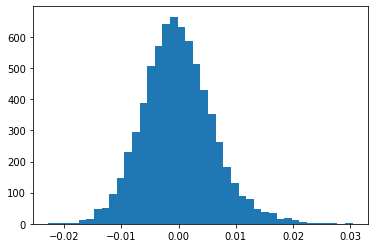

In [71]:
plt.hist(LogisticRegression().fit(X,y).coef_[0], bins=40)
plt.show()

In [73]:
pipeline = make_pipeline(SelectFromModel(LogisticRegression(),threshold=0.01),
                          LogisticRegression())

cross_val_score(pipeline,scale(X), y, cv=10).mean()

0.9857142857142858

## Selection using Features Importance
* applicable for tree-based algorithms (decision tree, random forest etc)


In [74]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [75]:
print(len(dt.feature_importances_))
dt.feature_importances_[dt.feature_importances_>0]

7129


array([0.0599445 , 0.82692948, 0.11312602])

In [76]:
pipeline = make_pipeline(SelectFromModel(DecisionTreeClassifier(),threshold=0.01),
                          LogisticRegression())

cross_val_score(pipeline,scale(X),y,cv=10).mean()

0.8892857142857142

In [77]:
pipeline = make_pipeline(SelectFromModel(DecisionTreeClassifier(),threshold=0.01),
                          DecisionTreeClassifier())

cross_val_score(pipeline,scale(X),y,cv=10).mean()

0.85

In [78]:
basic_acc

{'LR': 0.957, 'SVC': 0.805, 'DT': 0.864, 'RF': 0.961}

In [79]:
SelectFromModel(DecisionTreeClassifier(),threshold=0.01).fit_transform(X,y).shape

(72, 3)

### Random Forest
* one of the best method for feature selection
* based on averaged results from many trees
* the number of trees should be large (more than 100) for effective results

In [86]:
fi = RandomForestClassifier(100).fit(X,y).feature_importances_
len(fi[fi>0]), len(fi[fi>0.002]), len(fi[fi>0.01])

(345, 153, 10)

In [87]:
pipeline = make_pipeline(SelectFromModel(RandomForestClassifier(100),threshold=0.002),
                          LogisticRegression())

cross_val_score(pipeline,scale(X),y,cv=10).mean()

0.9714285714285715

In [84]:
basic_acc

{'LR': 0.957, 'SVC': 0.805, 'DT': 0.864, 'RF': 0.961}

## Recursive Feature Elimination
* iterative process of removing the least important features
* takes into consideration the cumulative impact of the features (compared to filter-based approach which is univariate)

In [88]:
from sklearn.feature_selection import RFE, RFECV

In [89]:
?RFE

In [97]:
# we can have at least 100 features; during each iteration, 200 are removed
selector = RFE(LogisticRegression(), n_features_to_select=100, step=200, verbose=1)
selected_features = selector.fit_transform(X,y)

Fitting estimator with 7129 features.
Fitting estimator with 6929 features.
Fitting estimator with 6729 features.
Fitting estimator with 6529 features.
Fitting estimator with 6329 features.
Fitting estimator with 6129 features.
Fitting estimator with 5929 features.
Fitting estimator with 5729 features.
Fitting estimator with 5529 features.
Fitting estimator with 5329 features.
Fitting estimator with 5129 features.
Fitting estimator with 4929 features.
Fitting estimator with 4729 features.
Fitting estimator with 4529 features.
Fitting estimator with 4329 features.
Fitting estimator with 4129 features.
Fitting estimator with 3929 features.
Fitting estimator with 3729 features.
Fitting estimator with 3529 features.
Fitting estimator with 3329 features.
Fitting estimator with 3129 features.
Fitting estimator with 2929 features.
Fitting estimator with 2729 features.
Fitting estimator with 2529 features.
Fitting estimator with 2329 features.
Fitting estimator with 2129 features.
Fitting esti

In [103]:
type(selected_features)

numpy.ndarray

In [114]:
selected_features.shape

(72, 100)

In [104]:
selector.get_support()

array([False, False, False, ..., False, False, False])

In [105]:
np.sum(selector.get_support())

100

In [102]:
# select the names of features (if our X is df)
features_names = ['A', 'B', 'C']
features_flags = [True, False, True]

[feat for feat, flag in zip(features_names, features_flags) if flag]

['A', 'C']

In [108]:
# select indices of features
[i for i, x in enumerate(features_flags) if x]

[0, 2]

In [112]:
np.where(features_flags)[0].tolist()

[0, 2]

In [115]:
pipeline = make_pipeline(RFE(LogisticRegression(), n_features_to_select=100, step=200),
                          LogisticRegression())

cross_val_score(pipeline, scale(X), y, cv=10).mean()

0.9571428571428571

In [117]:
pipeline = make_pipeline(RFE(DecisionTreeClassifier(), n_features_to_select=100, step=200),
                          LogisticRegression())

cross_val_score(pipeline, scale(X), y, cv=10).mean()

0.8446428571428571

It is better to use the same type of algo for feature selection as for model training. However, technically it is possible to use different ones. 

### RFECV - automatically select the number of features

In [118]:
RFECV?

In [126]:
selector = RFECV(LogisticRegression(), cv=3, step=50)
selector.fit(X, y)

RFECV(cv=3, estimator=LogisticRegression(), step=50)

In [125]:
selector.n_features_

229

In [124]:
pipeline = make_pipeline(RFECV(LogisticRegression(),cv=5,step=500, verbose=1),
                          LogisticRegression())

cross_val_score(pipeline,scale(X),y,cv=10).mean()

Fitting estimator with 7129 features.
Fitting estimator with 6629 features.
Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimator with 4129 features.
Fitting estimator with 3629 features.
Fitting estimator with 3129 features.
Fitting estimator with 2629 features.
Fitting estimator with 2129 features.
Fitting estimator with 1629 features.
Fitting estimator with 1129 features.
Fitting estimator with 629 features.
Fitting estimator with 129 features.
Fitting estimator with 7129 features.
Fitting estimator with 6629 features.
Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimator with 4129 features.
Fitting estimator with 3629 features.
Fitting estimator with 3129 features.
Fitting estimator with 2629 features.
Fitting estimator with 2129 features.
Fitting estima

Fitting estimator with 2129 features.
Fitting estimator with 1629 features.
Fitting estimator with 1129 features.
Fitting estimator with 629 features.
Fitting estimator with 129 features.
Fitting estimator with 7129 features.
Fitting estimator with 6629 features.
Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimator with 4129 features.
Fitting estimator with 3629 features.
Fitting estimator with 3129 features.
Fitting estimator with 2629 features.
Fitting estimator with 2129 features.
Fitting estimator with 1629 features.
Fitting estimator with 1129 features.
Fitting estimator with 629 features.
Fitting estimator with 129 features.
Fitting estimator with 7129 features.
Fitting estimator with 6629 features.
Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimato

Fitting estimator with 7129 features.
Fitting estimator with 6629 features.
Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimator with 4129 features.
Fitting estimator with 3629 features.
Fitting estimator with 3129 features.
Fitting estimator with 2629 features.
Fitting estimator with 2129 features.
Fitting estimator with 1629 features.
Fitting estimator with 1129 features.
Fitting estimator with 629 features.
Fitting estimator with 129 features.
Fitting estimator with 7129 features.
Fitting estimator with 6629 features.
Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimator with 4129 features.
Fitting estimator with 3629 features.
Fitting estimator with 3129 features.
Fitting estimator with 2629 features.
Fitting estimator with 2129 features.
Fitting estima

Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimator with 4129 features.
Fitting estimator with 3629 features.
Fitting estimator with 3129 features.
Fitting estimator with 2629 features.
Fitting estimator with 2129 features.
Fitting estimator with 1629 features.
Fitting estimator with 1129 features.
Fitting estimator with 629 features.
Fitting estimator with 129 features.
Fitting estimator with 7129 features.
Fitting estimator with 6629 features.
Fitting estimator with 6129 features.
Fitting estimator with 5629 features.
Fitting estimator with 5129 features.
Fitting estimator with 4629 features.
Fitting estimator with 4129 features.
Fitting estimator with 3629 features.
Fitting estimator with 3129 features.
Fitting estimator with 2629 features.
Fitting estimator with 2129 features.
Fitting estimator with 1629 features.
Fitting estimator with 1129 features.
Fitting estima

0.9857142857142858

## Filter-based Feature Selection
Sample filters:

1. Correlation between $Y$ and  $X$.

2. Mutual information between $X$ and $Y$:

$ I(X,Y) = H(Y) - H(Y | X)$,

where

$H(Y)$ - entropy of $Y$,

$H(Y|X)$ - entropy of $Y$, with known $X$ (conditional entropy).

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
SelectKBest?

In [ ]:
mutual_info_classif?

In [ ]:
pipeline = make_pipeline(SelectKBest(mutual_info_classif, k=100),
                          LogisticRegression())

cross_val_score(pipeline, scale(X), y, cv=10).mean()

## Task 1

For the given dataset, check different feature selection methods and different algorithms. Select the combination with highest perfomance.

__Algorithms to check__: 
* Logistic Regression, 
* Decision Tree, 
* Random Forest

__Methods__: 
* L1 regularization;
* feature importance based;
* RFE (with automatic selection is OK)
* filter based


In [ ]:
df = pd.read_csv("Dane/FS_test_data.csv")

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X.head()

In [ ]:
y.head()

# Metrics

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score,\
recall_score, precision_recall_curve, f1_score, confusion_matrix, auc

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_classes=2, weights=[0.92, 0.08],\
                           random_state=100)

In [ ]:
X.shape

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
np.unique(y, return_counts=True)

## Why accuracy is not enough?

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X, y)

In [ ]:
dummy.predict(X)

In [ ]:
dummy.score(X, y)

In [ ]:
lr = LogisticRegression()
lr.fit(X, y)
lr.score(X, y)

In [ ]:
predictions = lr.predict(X)

In [ ]:
predictions

In [ ]:
np.unique(predictions, return_counts=True)

In [ ]:
confusion_matrix(predictions, y)

In [ ]:
pd.DataFrame(confusion_matrix(predictions, y), index=['Pred 0', 'Pred 1'], columns=['Actual 0', 'Actual 1'])

In [ ]:
a = pd.DataFrame([predictions, y]).T
a.columns = ['Predict', 'Actual']
a.head()

### Recall
* of all positive cases (class 1), how many we have detected

In [ ]:
recall_df = a[a.Actual==1]
recall_df

In [ ]:
recall = recall_df.Predict.sum() / recall_df.Actual.sum()
recall

### Precision
* of what we have predicted as positive case (class 1), how many cases are really positive

In [ ]:
precision_df = a[a.Predict==1]
precision_df

In [ ]:
precision = precision_df.Actual.sum() / precision_df.Predict.sum()
precision

## F-1 Score
* harmonic average of precision and recall

In [ ]:
f1 = 2 * precision * recall / (precision + recall)
f1

## Metrics using sklearn

In [ ]:
recall_score(y, predictions)

In [ ]:
precision_score(y, predictions)

In [ ]:
f1_score(predictions, y)

## ROC curve
* False Positive Rate (FPR)
* True Positive Rate (TPR)
* AUC - area under curve => the higher, the better; max value = 1.
* $gini = 2 * AUC - 1$

In [ ]:
predcitions_proba = lr.predict_proba(X)
predcitions_proba[:5]

In [ ]:
#roc_curve?

In [ ]:
y_true = y
y_score = predcitions_proba[:, 1]

In [ ]:
# false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_score)

In [ ]:
# area under curve
roc_auc = roc_auc_score(y_true, y_score)

In [ ]:
plt.plot(fpr, tpr, label = f"AUC = {roc_auc : .2f}")
plt.title("ROC")
plt.xlabel("False Posititve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

## Precision Recall Curve

In [ ]:
precision_recall_curve?

In [ ]:
p, r, _ = precision_recall_curve(y_true, y_score)

In [ ]:
plt.plot(r, p)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [ ]:
auc(r, p)

### Metrics Summary:
* accuracy is not the best metrics for imbalanced data;
* precision and recall may be useful in case of immablanced data;
* ROC curve is better for balanced data whereas precision-recall curve is better for imbalanced;

## Task 2

For the given dataset __metrics_test.csv__, conduct classification using two algorithms:
* Logistic Regression
* Decision Tree

Compare their performance using __accuracy, precision, recall, F-1 and ROC__. Which model would you choose and why?

__Note__: 
1. the last column in the dataset is the target
2. it is worth to use dummy classifier first to understanf its baseline accuracy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.datasets import make_classification
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# X, y = make_classification(n_samples=200, n_features=10, n_informative=6, n_redundant=4, n_classes=2, weights=[0.80, 0.20],\
#                            random_state=123)

# y = y.reshape(-1, 1)
# pd.DataFrame(np.concatenate((X, y), axis=1)).to_csv("metrics_test.csv", index=False)

In [ ]:
df = pd.read_csv("Dane/metrics_test.csv")

X = df.drop('10', axis=1)
y = df['10']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
lr_preds = lr.predict(X_test)

In [ ]:
lr_acc = lr.score(X_test, y_test)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

print(lr_acc, lr_precision, lr_recall, lr_f1)

In [ ]:
# {'name': 'Ros Apostol', 
#  'age': 32,
#  'in_love_with_ML_from': 2016,
#  'city': 'Krakow', 
#  'jobs': [
#      {'Schlumberger': 'Data Science Tech Lead'},
#      {'Sages': 'Data Science Trainer'}
#  ], 
#  'certificates': [
#      {'AWS': ['Machine Learning Specilaty']},
#      {'Azure': ['Azure Data Scientist', 'Azure AI Engineer']}
#  ], 
#  'hobbies': ['data science & MLOps', 
#              'philosophy & theology',
#              'foreign languages', 
#              'traveling'], 
#  'LinkedIn': 'https://www.linkedin.com/in/apostolros/',
# }